In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches

In [2]:
data = pd.read_parquet('data/Mistral/temp_0/data_mistral_complete.parquet', engine='pyarrow')

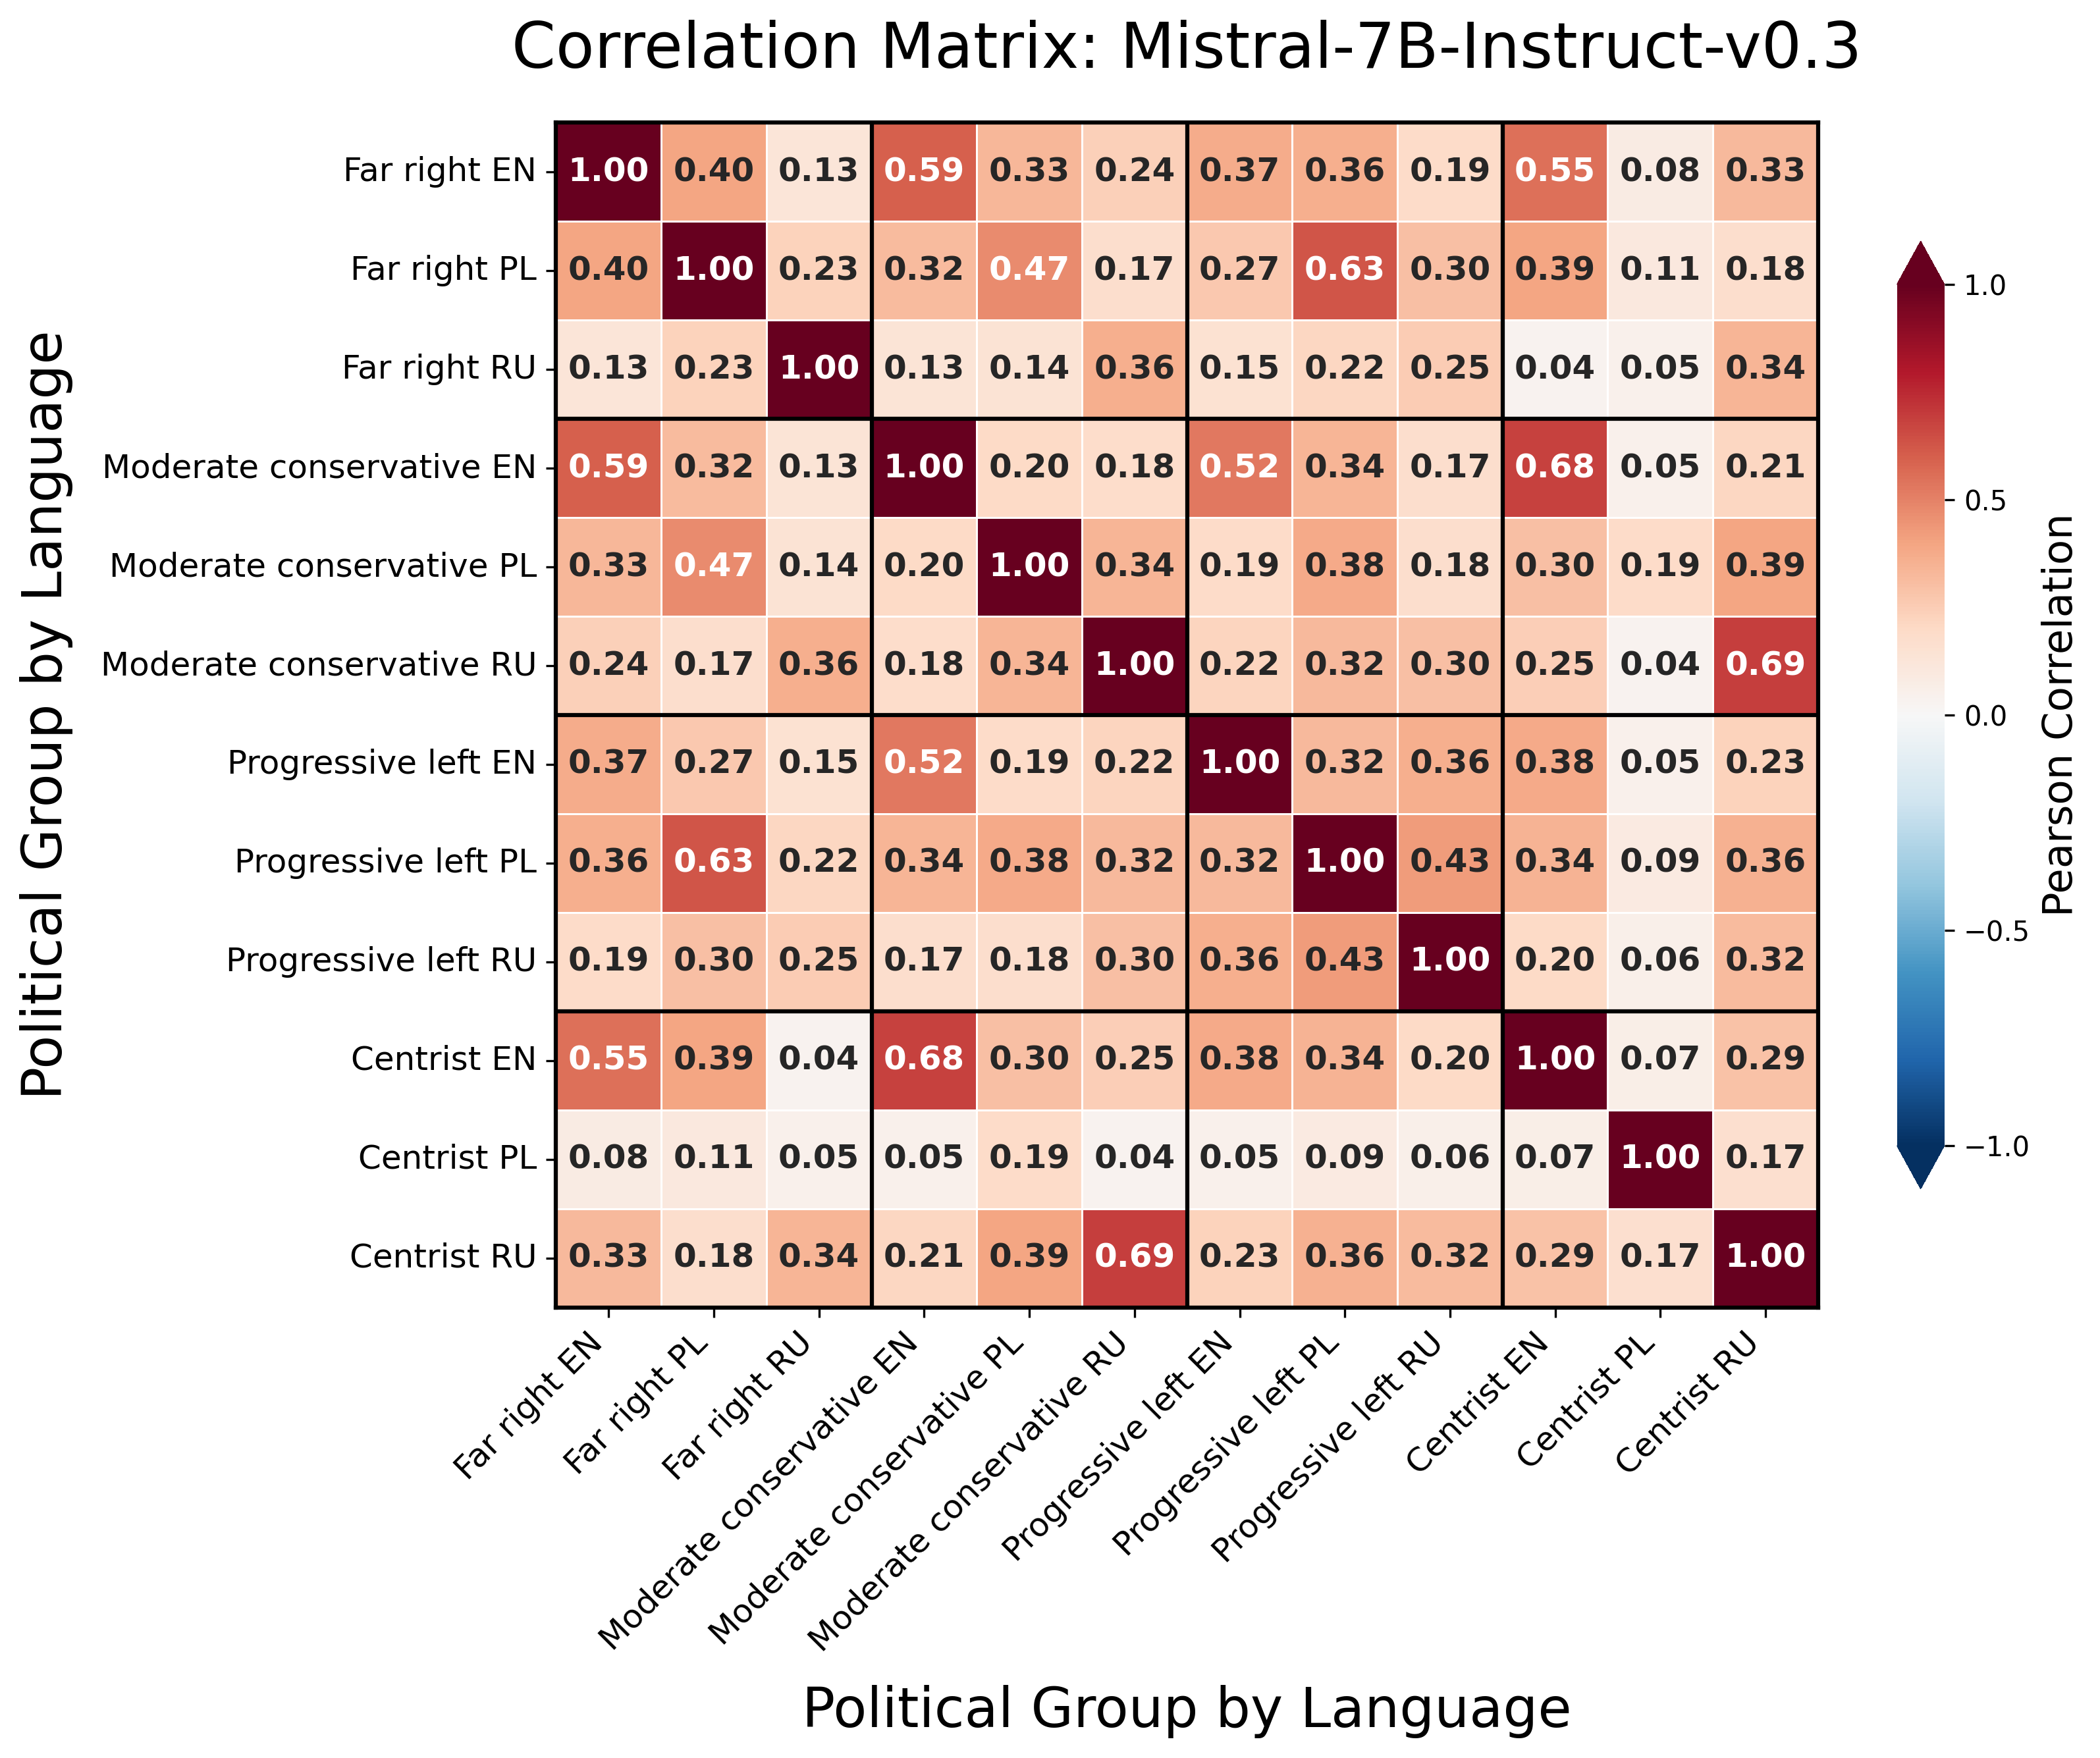

In [3]:
# Set font to a guaranteed available font
plt.rcParams['font.family'] = 'DejaVu Sans'

folder_name = "Mistral/temp_0"
plot_name = 'mistral'
target_columns_names = [col for col in data if col.startswith('Mistral')]
model_name = "Mistral-7B-Instruct-v0.3"
cat_prefix = "Mistral"



# Define display labels that will be shown in the plot
display_labels = [
    'Far right EN', 'Far right PL', 'Far right RU',
    'Moderate conservative EN', 'Moderate conservative PL', 'Moderate conservative RU',
    'Progressive left EN', 'Progressive left PL', 'Progressive left RU',
    'Centrist EN', 'Centrist PL', 'Centrist RU'
]

# Create a mapping between actual columns and display labels
col_to_label = dict(zip(target_columns_names, display_labels))

# Convert None values to NaN which pandas recognizes
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1)[target_columns_names]

# Calculate correlation
corr = data_for_plot.corr(method='pearson')

# custom_cmap = LinearSegmentedColormap.from_list('colorblind_friendly', colors)
colors = plt.cm.RdBu_r(np.linspace(0, 1, 256))
custom_cmap = LinearSegmentedColormap.from_list('custom_diverging', colors)


# Set up the figure with higher DPI for publication quality
plt.figure(figsize=(11, 9), dpi=300)

# Create the heatmap with improved aesthetics
ax = sns.heatmap(
    corr,
    cmap=custom_cmap,
    vmin=-1, vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 12, "weight": "semibold"},
    linewidths=0.3,
    cbar_kws={
        "shrink": 0.8,
        "label": "Pearson Correlation",
        "ticks": [-1.0, -0.5, 0.0, 0.5, 1.0],
        "extend": "both"
    }
)

cbar = ax.collections[0].colorbar
cbar.set_label("Pearson Correlation", fontsize=15)
# Add a black border around the heatmap
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

# Define categories and languages
categories = ['Far right', 'Moderate conservative', 'Progressive left', 'Centrist']
languages = ['EN', 'PL', 'RU']

# Map data columns to their categories and languages
col_categories = {
    f'{cat_prefix}_far_right_EN_answer': ('Far right', 'EN'),
    f'{cat_prefix}_far_right_PL_answer': ('Far right', 'PL'),
    f'{cat_prefix}_far_right_RU_answer': ('Far right', 'RU'),
    f'{cat_prefix}_mod_cons_EN_answer': ('Moderate conservative', 'EN'),
    f'{cat_prefix}_mod_cons_PL_answer': ('Moderate conservative', 'PL'),
    f'{cat_prefix}_mod_cons_RU_answer': ('Moderate conservative', 'RU'),
    f'{cat_prefix}_prog_left_EN_answer': ('Progressive left', 'EN'),
    f'{cat_prefix}_prog_left_PL_answer': ('Progressive left', 'PL'),
    f'{cat_prefix}_prog_left_RU_answer': ('Progressive left', 'RU'),
    f'{cat_prefix}_centrist_EN_answer': ('Centrist', 'EN'),
    f'{cat_prefix}_centrist_PL_answer': ('Centrist', 'PL'),
    f'{cat_prefix}_centrist_RU_answer': ('Centrist', 'RU')
}



# Group columns by category
cat_indices = {}
for i, col in enumerate(target_columns_names):
    cat = col_categories[col][0]
    if cat not in cat_indices:
        cat_indices[cat] = []
    cat_indices[cat].append(i)

categories = {
    'Far-right': [f'{cat_prefix}_far_right_EN_answer', f'{cat_prefix}_far_right_PL_answer', f'{cat_prefix}_far_right_RU_answer'],
    'Moderate Conservative': [f'{cat_prefix}_mod_cons_EN_answer', f'{cat_prefix}_mod_cons_PL_answer', f'{cat_prefix}_mod_cons_RU_answer'],
    'Progressive Left': [f'{cat_prefix}_prog_left_EN_answer', f'{cat_prefix}_prog_left_PL_answer', f'{cat_prefix}_prog_left_RU_answer'],
    'Centrist': [f'{cat_prefix}_centrist_EN_answer', f'{cat_prefix}_centrist_PL_answer', f'{cat_prefix}_centrist_RU_answer']
}
# Add separators between ideological groups
idx = 0
for category, cols in categories.items():
    idx += len(cols)
    if idx < len(target_columns_names):
        plt.axhline(y=idx, color='black', linestyle='-', linewidth=1.5)
        plt.axvline(x=idx, color='black', linestyle='-', linewidth=1.5)
categories = ['Far right', 'Moderate conservative', 'Progressive left', 'Centrist']
# Use display labels for tick labels
ax.set_xticklabels([col_to_label[col] for col in target_columns_names], rotation=45, ha='right', fontsize=12)
ax.set_yticklabels([col_to_label[col] for col in target_columns_names], fontsize=12)

# Add title and labels
plt.title(f'Correlation Matrix: {model_name}', fontsize=23, pad=20)
plt.xlabel('Political Group by Language', fontsize=20, labelpad=10)
plt.ylabel('Political Group by Language', fontsize=20, labelpad=10)


# Adjust layout and save
plt.tight_layout()
# plt.savefig(f'data/{folder_name}/correlation_plot_{plot_name}.png', dpi=300, bbox_inches='tight')
plt.savefig(f"data/{folder_name}/correlation_plot_{plot_name}.pdf", format="pdf", bbox_inches="tight", dpi=300)

plt.show()

# Probabilities

In [2]:
data = pd.read_parquet('data/Mistral/temp_1/data_mistral_complete.parquet', engine='pyarrow')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 1 to 300
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Text_EN                      300 non-null    object 
 1   Text_PL                      300 non-null    object 
 2   Text_RU                      300 non-null    object 
 3   Translation_quality          300 non-null    float64
 4   Mistral_far_right_EN_answer  300 non-null    object 
 5   Mistral_far_right_PL_answer  300 non-null    object 
 6   Mistral_far_right_RU_answer  300 non-null    object 
 7   Mistral_mod_cons_EN_answer   300 non-null    object 
 8   Mistral_mod_cons_PL_answer   300 non-null    object 
 9   Mistral_mod_cons_RU_answer   300 non-null    object 
 10  Mistral_prog_left_EN_answer  300 non-null    object 
 11  Mistral_prog_left_PL_answer  300 non-null    object 
 12  Mistral_prog_left_RU_answer  300 non-null    object 
 13  Mistral_centrist_EN_

In [12]:

# Step 1: Split into two new DataFrames: P1 (prob. of 1) and P0 (prob. of 0)
P1 = data.iloc[:,4:].applymap(lambda x: float(x.split(',')[0].strip()))
P0 = data.iloc[:,4:].applymap(lambda x: float(x.split(',')[1].strip()))

# Step 2: Analyze each column
analysis = pd.DataFrame(index=data.iloc[:,4:].columns)
analysis['Mean P(1)'] = P1.mean()
analysis['Mean P(0)'] = P0.mean()
analysis['Min P(1)'] = P1.min()
analysis['Max P(1)'] = P1.max()
analysis['Std P(1)'] = P1.std()
analysis['Determination'] = P1.apply(lambda col: ((col <= 0.05) | (col >= 0.95)).sum()/300)
analysis['Sanity Check (P1 + P0 ≈ 1)'] = (P1 + P0).apply(lambda col: (col.sub(1).abs() < 1e-2).sum())

print(analysis['Determination'].mean())
print(analysis)


0.8044444444444445
                             Mean P(1)  Mean P(0)  Min P(1)  Max P(1)  \
Mistral_far_right_EN_answer   0.496318   0.503264    0.0000    0.9999   
Mistral_far_right_PL_answer   0.733301   0.265266    0.0000    0.9997   
Mistral_far_right_RU_answer   0.703199   0.295544    0.0001    0.9992   
Mistral_mod_cons_EN_answer    0.668127   0.331598    0.0000    1.0000   
Mistral_mod_cons_PL_answer    0.841022   0.156094    0.0000    0.9999   
Mistral_mod_cons_RU_answer    0.835353   0.163485    0.0006    0.9995   
Mistral_prog_left_EN_answer   0.663782   0.335623    0.0000    1.0000   
Mistral_prog_left_PL_answer   0.787556   0.208964    0.0000    0.9998   
Mistral_prog_left_RU_answer   0.831067   0.166946    0.0004    0.9991   
Mistral_centrist_EN_answer    0.515013   0.484904    0.0000    1.0000   
Mistral_centrist_PL_answer    0.747076   0.252523    0.0000    0.9997   
Mistral_centrist_RU_answer    0.811684   0.187469    0.0004    0.9994   

                             St

/tmp/ipykernel_24487/348781213.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  P1 = data.iloc[:,4:].applymap(lambda x: float(x.split(',')[0].strip()))
/tmp/ipykernel_24487/348781213.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  P0 = data.iloc[:,4:].applymap(lambda x: float(x.split(',')[1].strip()))


In [4]:
def convert_col_name(col_name):
    if "far" in col_name:
        name = "Far-right"
    elif 'mod' in col_name:
        name = "Moderate conservative"
    elif "prog" in col_name:
        name = "Progressive left"
    else:
        name = "Centrist"
    
    if "EN" in col_name:
        name += " English"
    elif 'PL' in col_name:
        name += " Polish"
    else:
        name += " Russian"
    return name
convert_col_name('Gemma_prog_left_RU_answer')

'Progressive left Russian'

/tmp/ipykernel_90280/3969967145.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  P1 = data.iloc[:,4:].applymap(lambda x: float(x.split(',')[0].strip()))
/tmp/ipykernel_90280/3969967145.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


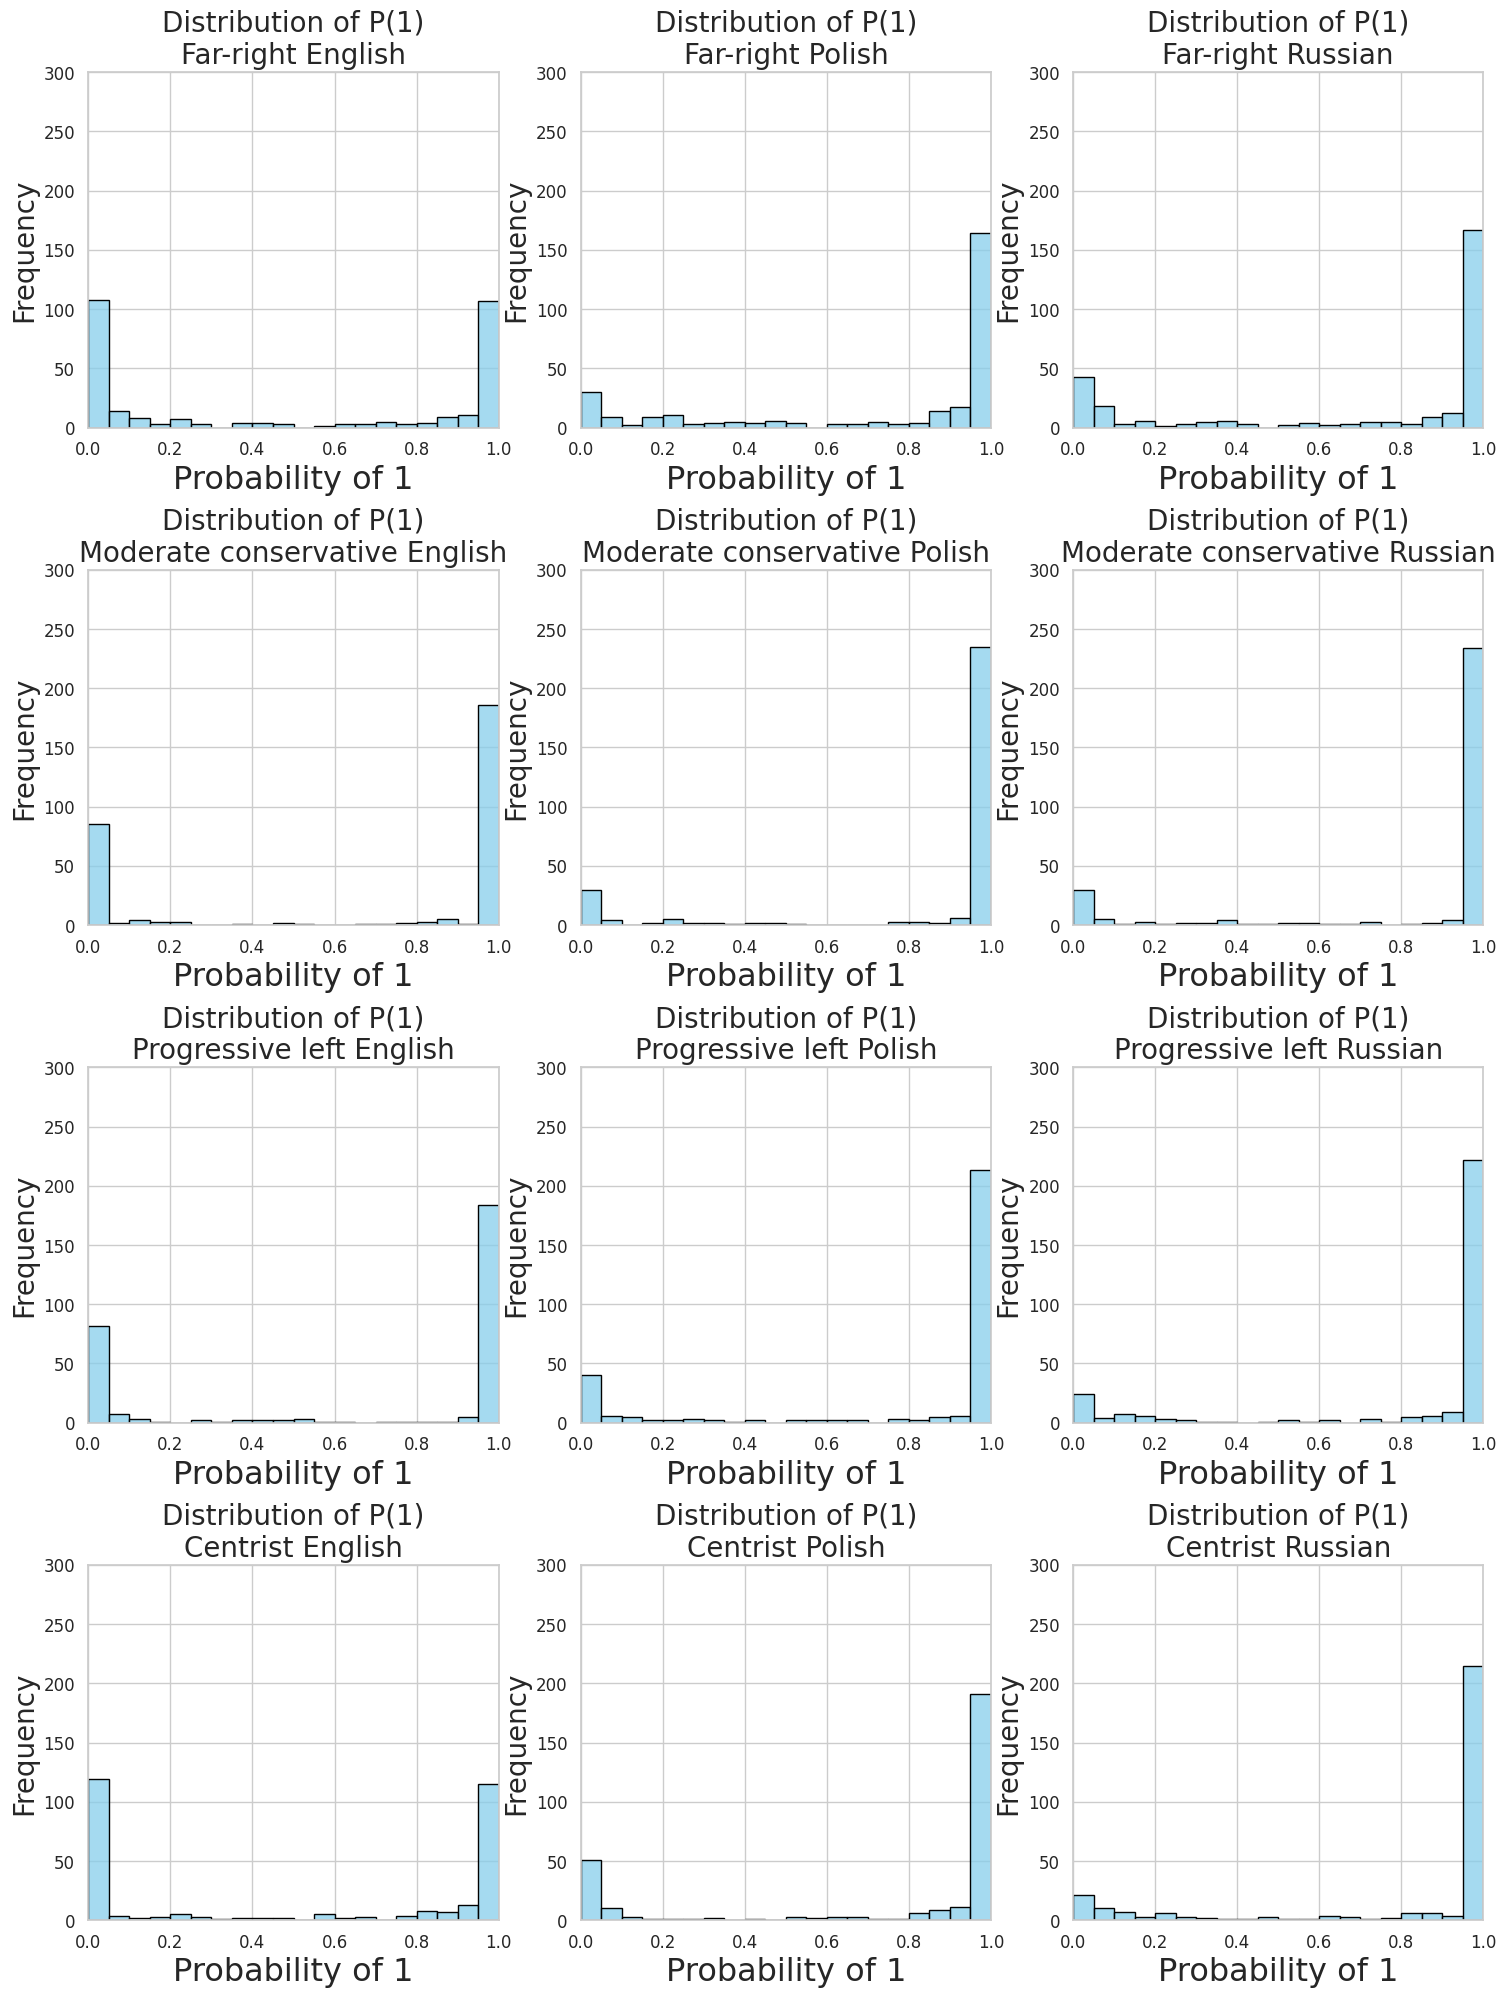

In [7]:

import seaborn as sns

import math

# Extract P(1) values
# Extract P(1) values
P1 = data.iloc[:,4:].applymap(lambda x: float(x.split(',')[0].strip()))

# Settings
sns.set(style="whitegrid")
cols_per_row = 3
total_plots = len(P1.columns)
rows = math.ceil(total_plots / cols_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(6 * cols_per_row, 6 * rows), gridspec_kw={'hspace': 0.4})
axes = axes.flatten()

# Plot each column
# Plot each column
for i, col in enumerate(P1.columns):
    sns.histplot(
        P1[col], 
        kde=False,  # Disable default KDE
        ax=axes[i], 
        bins=20, 
        color="skyblue", 
        edgecolor='black'
    )
    
    # # Add KDE separately with explicit color control
    # sns.kdeplot(
    #     P1[col], 
    #     color='red', 
    #     lw=2, 
    #     ax=axes[i]
    # )

    axes[i].set_title(
        f'Distribution of P(1)\n{convert_col_name(col)}',
        fontsize=20
    )

    axes[i].set_xlabel('Probability of 1', fontsize=23)
    axes[i].set_ylabel('Frequency', fontsize=20)
    axes[i].set_ylim(0, 300)
    axes[i].set_xlim(0, 1)
    axes[i].tick_params(axis='both', labelsize=12)

# Hide unused subplots
for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig("data/Mistral/temp_1/distributions.pdf", format="pdf", bbox_inches="tight")
plt.show()
